# Preprocess and descriptive data analysis

## Data source (IBM):
 https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
raw_data = pd.read_csv('customer_churn_data.csv')
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Each line of the above dataframe corresponds to a subscriber or a customer and includes the following information:
 - demographic
 - service plan
 - media usage
 - churn status
 - tenure time

In [3]:
# Check for null values
raw_data.isnull().sum() # Therefore there is no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Check type of data in each column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#drop rows where TotalCharges is empty
raw_data = raw_data[raw_data['TotalCharges']!=' ']
# change TotalCharges from string to float
raw_data = raw_data.astype({"TotalCharges": float})
# convert SeniorCitizen from (0, 1) to ('Yes', 'No')
raw_data['SeniorCitizen'] = raw_data['SeniorCitizen'].map({0:'Not senior', 1:'Senior'})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
# Get statistics of data numerical data
raw_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Save preprocessed data for ML

In [7]:
raw_data.to_csv('preprocessed_data_telecom.csv', index=False)

# Dataset overall churn ratio

In [8]:
# get the churn ratio and plot
Churn_numbers = raw_data.groupby('Churn').agg({'Churn':'count'})
Churn_pct = Churn_numbers/Churn_numbers.sum()*100
Churn_pct

,Churn
Churn,
No,73.421502
Yes,26.578498


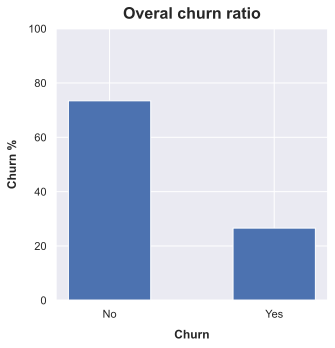

In [9]:
fig = plt.figure()
fig.set_figheight(5)
ax = fig.add_subplot(111)
plt.bar(x=Churn_pct.index, height=Churn_pct['Churn'], width=0.5)
plt.ylabel('Churn %', labelpad=10, fontweight='bold')
plt.xlabel('Churn', labelpad=10, fontweight='bold')
plt.title('Overal churn ratio', fontweight='bold', pad=10, fontsize=16)
plt.ylim(0,100)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#fig.show()
#plt.rcParams['figure.figsize'] = [2, 2]
# save the image
imagename = '1_1_overal_churn_ratio'
plt.savefig(f'./images/{imagename}.svg')

 -  The above plot shows the churn rate for the dataset. According to the results about 27% of customers have a known churn status.

# Plot churn rate for each category

In [10]:
def churn_rate(col):
    ''' 
    cacluate churn rate for each category
    '''
    grouped = raw_data.groupby([col,'Churn']).size().unstack()
    grouped_churn = grouped.div(grouped.sum(axis=1),axis=0)
    return grouped_churn

def group_size(col):
    ''' 
    cacluate population size of each category
    '''
    grouped = raw_data.groupby([col]).size()
    return grouped


def plot_churn_rate(col, imagename, rotation=0, rotationaxis='x', xfont=12):
    '''
    plot churn rate for each categorical variable
    '''
    gc = churn_rate(col)
    idx = list(gc.index)
    churn_pct = [gc.loc[i,'Yes']*100 for i in idx]
    gc_1 = group_size(col)
    idx_1 = list(gc_1.index)
    cnt = [gc_1[i] for i in idx_1]
    fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
    #ax = fig.add_subplot(1,2)
    ax[0].bar(x=idx, height=churn_pct, width=0.5)
    ax[0].set_ylabel('Churn %', labelpad=10, fontweight='bold')
    ax[0].set_xlabel(col, labelpad=10, fontweight='bold')
    ax[0].set_title(f'Churn by {col}',pad=10, fontweight='bold')
    #ax1.set_xticks(rotation=rotation, fontsize=xfont)
    ax[0].tick_params(labelrotation=rotation, axis=rotationaxis, labelsize = xfont)
    ax[0].set_ylim(0,100)
    ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')

    ax[1].bar(x=idx_1, height=cnt, width=0.5, color='green')
    ax[1].set_ylabel('Count', labelpad=10, fontweight='bold')
    ax[1].set_xlabel(col, labelpad=10, fontweight='bold')
    ax[1].set_title(f'Users by {col}',pad=10, fontweight='bold')
    #ax1.set_xticks(rotation=rotation, fontsize=xfont)
    ax[1].tick_params(labelrotation=rotation, axis=rotationaxis, labelsize = xfont)
    
    ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')
    fig.tight_layout(w_pad=4)
    #fig.suptitle(f'Churn by {col}', fontsize=18, fontweight='bold')
    #fig.suptitle(col)
    #plt.subplots_adjust(hspace=0.3)
    #plt.rcParams['figure.figsize'] = [2, 4]
    # save the image
    plt.savefig(f'./images/{imagename}.svg')
    return fig

## Churn by gender

Churn,No,Yes
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


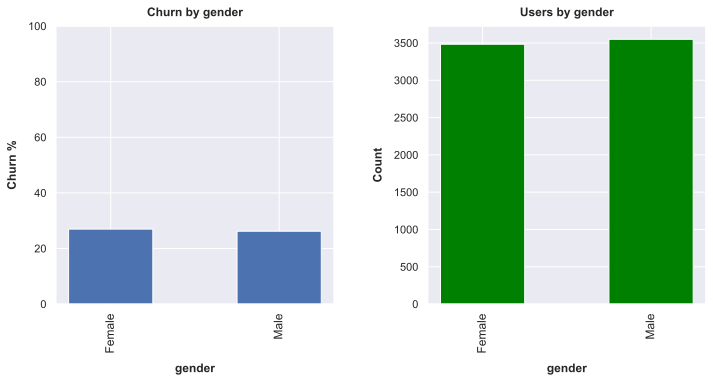

In [11]:
col = 'gender'
imagename = '1_2_churn_by_gender'
plot_churn_rate(col, imagename, rotation = 90, rotationaxis='x')
churn_rate(col)

## Churn by seniority

Churn,No,Yes
SeniorCitizen,,
Not senior,0.763497,0.236503
Senior,0.583187,0.416813


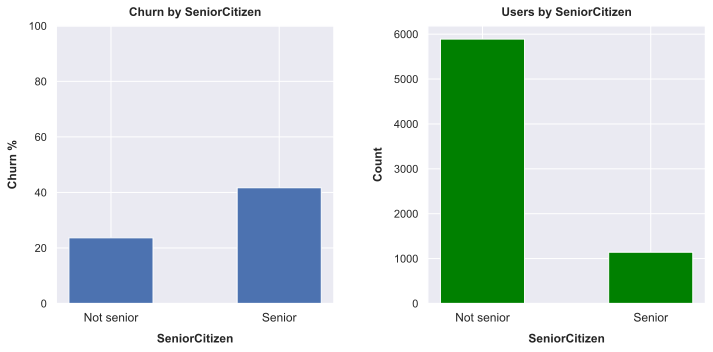

In [12]:
col = 'SeniorCitizen'
imagename = '1_3_churn_by_SeniorCitizen'
plot_churn_rate(col, imagename)
churn_rate(col)

## Churn by Partner

Churn,No,Yes
Partner,,
No,0.670239,0.329761
Yes,0.802829,0.197171


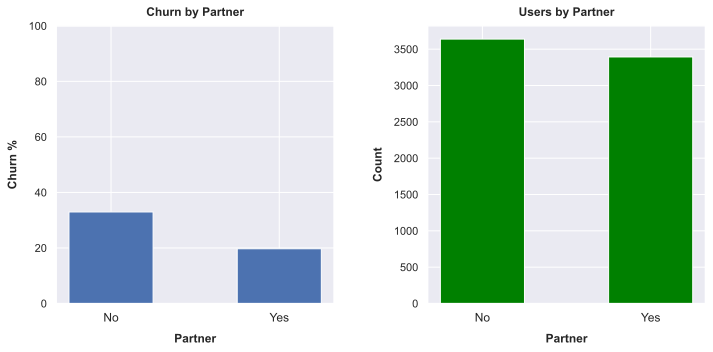

In [13]:
col = 'Partner'
imagename = '1_4_churn_by_Partner'
plot_churn_rate(col, imagename)
churn_rate(col)

## Churn by Dependents

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.844688,0.155312


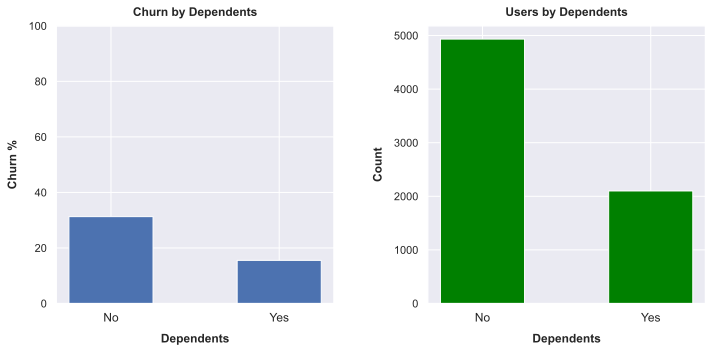

In [14]:
col = 'Dependents'
imagename = '1_5_churn_by_Dependents'
plot_churn_rate(col, imagename)
churn_rate(col)

## Churn by phone service

Churn,No,Yes
PhoneService,,
No,0.750000,0.250000
Yes,0.732525,0.267475


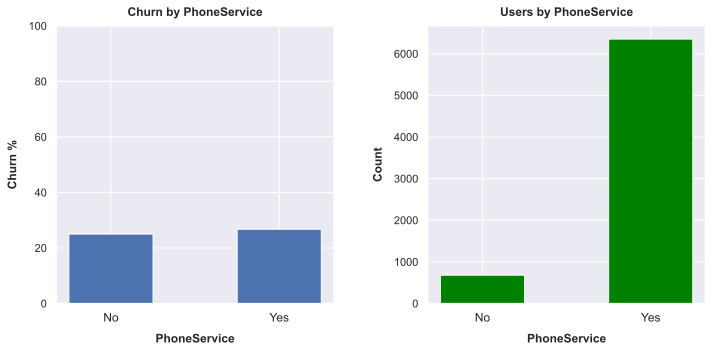

In [15]:
col = 'PhoneService'
imagename = '1_6_churn_by_PhoneService'
plot_churn_rate(col, imagename)
churn_rate(col)

## Churn by MultipleLines

Churn,No,Yes
MultipleLines,,
No,0.749188,0.250812
No phone service,0.750000,0.250000
Yes,0.713515,0.286485


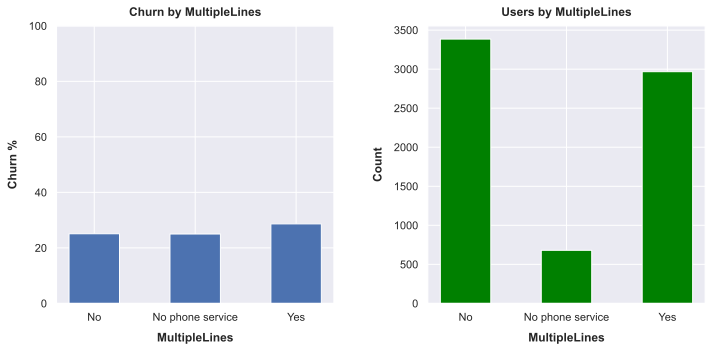

In [16]:
col = 'MultipleLines'
imagename = '1_7_churn_by_Multilines'
plot_churn_rate(col, imagename, rotation=0, rotationaxis='x', xfont=11)
churn_rate(col)

## Churn by InternetService

Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


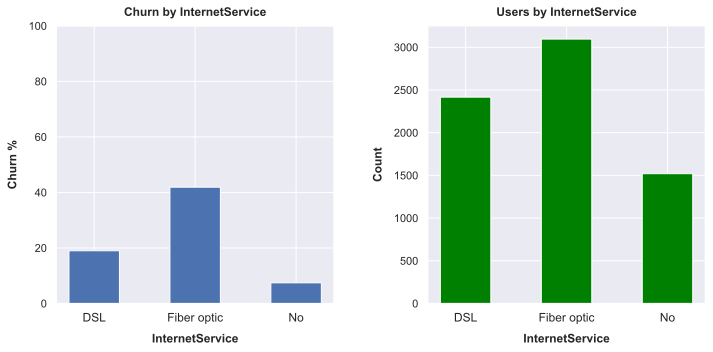

In [17]:
col = 'InternetService'
imagename = '1_8_churn_by_InternetService'
plot_churn_rate(col, imagename)
churn_rate(col)

## Churn by OnlineSecurity

Churn,No,Yes
OnlineSecurity,,
No,0.582213,0.417787
No internet service,0.925658,0.074342
Yes,0.853598,0.146402


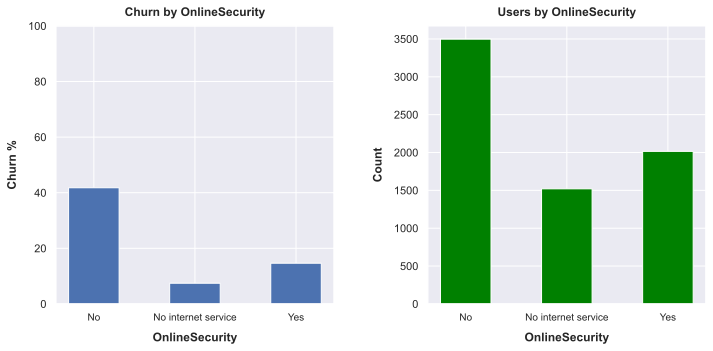

In [18]:
col = 'OnlineSecurity'
imagename = '1_9_churn_by_OnlineSecurity'
plot_churn_rate(col, imagename, rotation=0, xfont=10)
churn_rate(col)

## Churn by OnlineBackup

Churn,No,Yes
OnlineBackup,,
No,0.600583,0.399417
No internet service,0.925658,0.074342
Yes,0.784330,0.215670


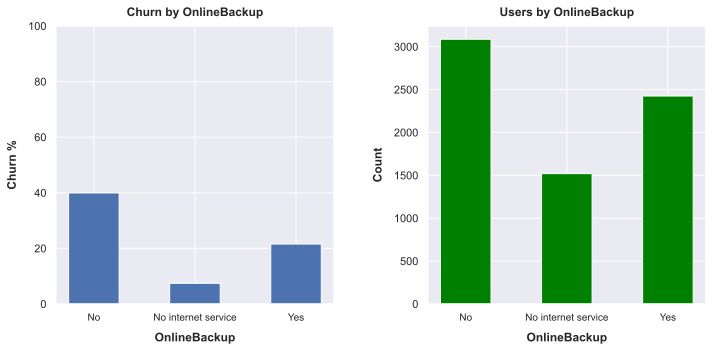

In [19]:
col = 'OnlineBackup'
imagename = '1_10_churn_by_OnlineBackup'
plot_churn_rate(col, imagename, rotation=0, xfont=10)
churn_rate(col)

## Churn by DeviceProtection

Churn,No,Yes
DeviceProtection,,
No,0.608597,0.391403
No internet service,0.925658,0.074342
Yes,0.774607,0.225393


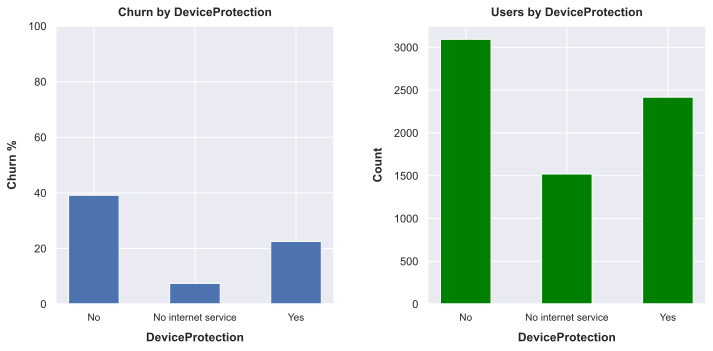

In [20]:
col = 'DeviceProtection'
imagename = '1_11_churn_by_DeviceProtection'
plot_churn_rate(col, imagename, rotation=0, xfont=10)
churn_rate(col)

## Churn by TechSupport

Churn,No,Yes
TechSupport,,
No,0.583525,0.416475
No internet service,0.925658,0.074342
Yes,0.848039,0.151961


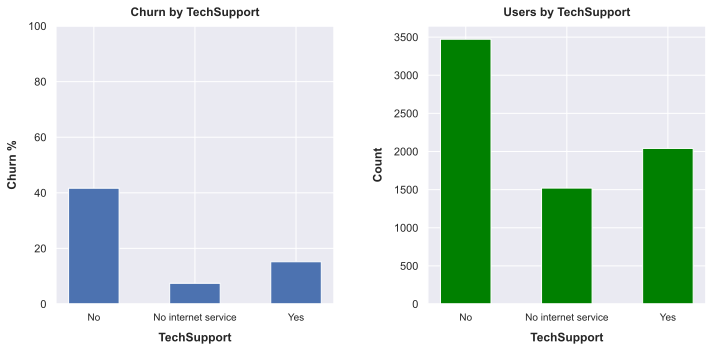

In [21]:
col = 'TechSupport'
imagename = '1_12_churn_by_Techsupport'
plot_churn_rate(col, imagename, rotation=0, xfont=10)
churn_rate(col)

## Churn by StreamingTV

Churn,No,Yes
StreamingTV,,
No,0.664649,0.335351
No internet service,0.925658,0.074342
Yes,0.698853,0.301147


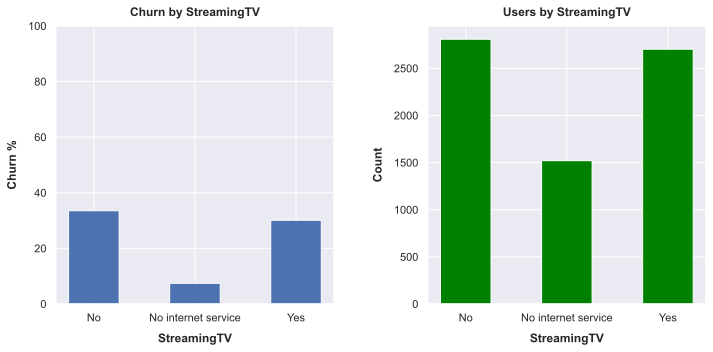

In [22]:
col = 'StreamingTV'
imagename = '1_13_churn_by_StreamingTV'
plot_churn_rate(col, imagename, rotation=0, xfont=11)
churn_rate(col)

## Churn by StreamingMovies

Churn,No,Yes
StreamingMovies,,
No,0.662711,0.337289
No internet service,0.925658,0.074342
Yes,0.700476,0.299524


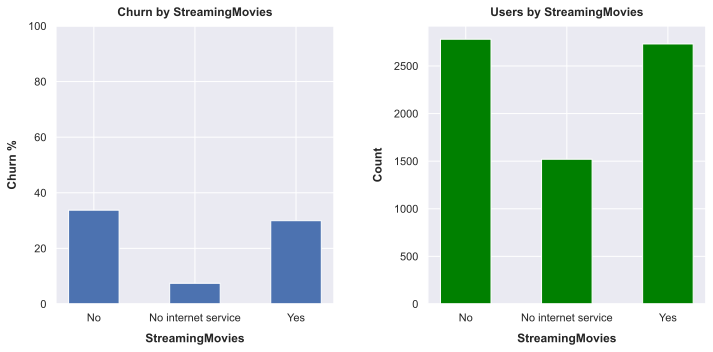

In [23]:
col = 'StreamingMovies'
imagename = '1_14_churn_by_StreamingMovies'
plot_churn_rate(col, imagename, rotation=0, xfont=11)
churn_rate(col)

## Churn by Contract type

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


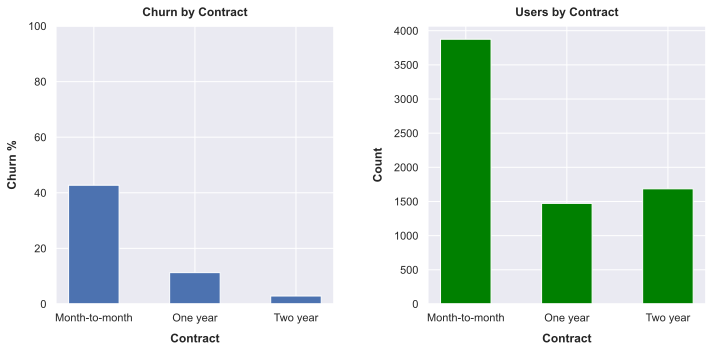

In [24]:
col = 'Contract'
imagename = '1_15_churn_by_Contract'
plot_churn_rate(col, imagename, rotation=0, xfont=11)
churn_rate(col)

## Churn by PaperlessBilling

Churn,No,Yes
PaperlessBilling,,
No,0.836243,0.163757
Yes,0.664107,0.335893


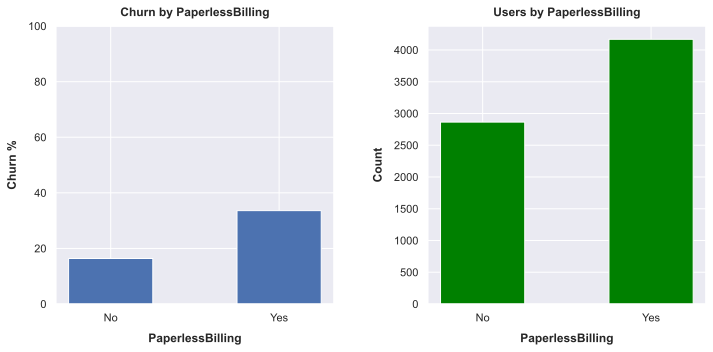

In [25]:
col = 'PaperlessBilling'
imagename = '1_16_churn_by_PaperlessBilling'
plot_churn_rate(col, imagename, rotation=0, xfont=11)
churn_rate(col)

## Churn by payment method

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


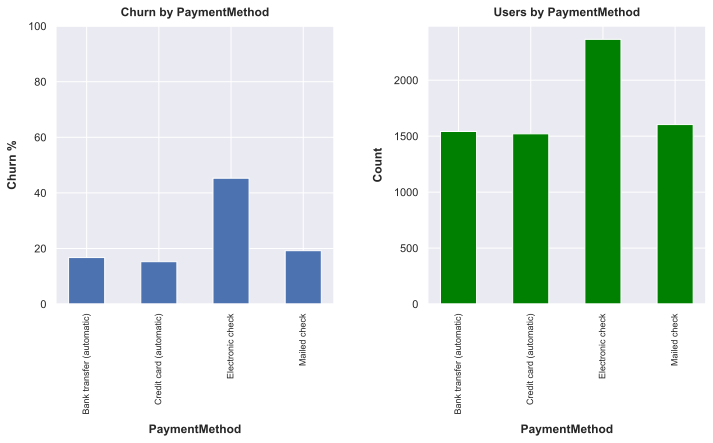

In [26]:
col = 'PaymentMethod'
imagename = '1_17_churn_by_PaymentMethod'
plot_churn_rate(col, imagename, rotation=90, rotationaxis='x', xfont=9)
churn_rate(col)

# Distribution of Tenure time for all customers

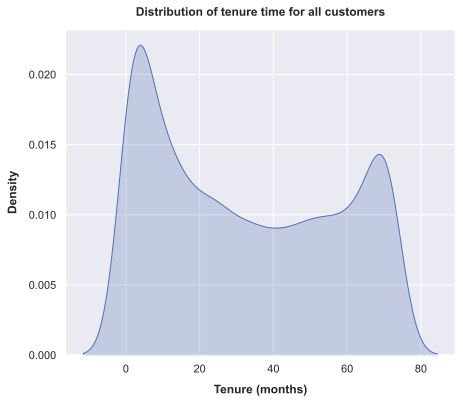

In [27]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
sns.kdeplot(data=raw_data, x="tenure", fill=True, ax=ax)
plt.ylabel('Density', labelpad=10, fontweight='bold')
plt.xlabel('Tenure (months)', labelpad=10, fontweight='bold')
plt.title('Distribution of tenure time for all customers', pad=14, fontweight='bold')
imagename = '1_18_Distribution_of_Tenure_all_customers'
plt.savefig(f'./images/{imagename}.svg')

# Distribution of tenure time for customers, stratified by churn

In [28]:
# find churn relationship by tenure
tenure_churn = raw_data.loc[raw_data['Churn']=='Yes','tenure'].values
tenure_not_churn = raw_data.loc[raw_data['Churn']!='Yes','tenure'].values

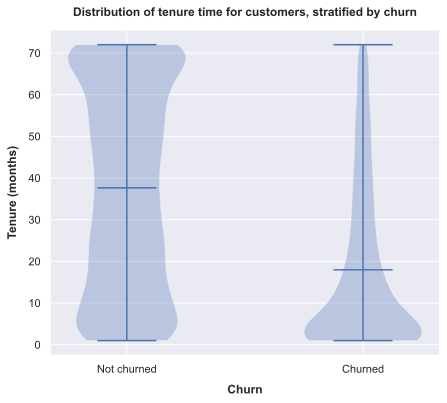

In [29]:
fig = plt.figure(figsize=(7,6))
plt.violinplot([tenure_not_churn,tenure_churn],[0,1], showmeans=True);
plt.xticks([0, 1], ['Not churned','Churned']);
plt.ylabel('Tenure (months)', labelpad=10, fontweight='bold')
plt.xlabel('Churn', labelpad=10, fontweight='bold')
plt.title('Distribution of tenure time for customers, stratified by churn', pad=14, fontweight='bold');
imagename = '1_19_Distribution_of_Tenure_stratified_by_Churn'
plt.savefig(f'./images/{imagename}.svg')

#### Based on this plot, it seems that customers who churned usually did it early in their subscription

# Distribution of monthly charges for all customers

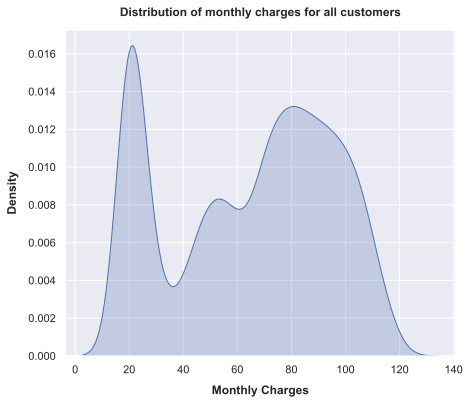

In [30]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
sns.kdeplot(data=raw_data, x="MonthlyCharges", fill=True, ax=ax)
plt.ylabel('Density', labelpad=10, fontweight='bold')
plt.xlabel('Monthly Charges', labelpad=10, fontweight='bold')
plt.title('Distribution of monthly charges for all customers', pad=14, fontweight='bold');
imagename = '1_20_Distribution_of_MonthlyCharges_all_customers'
plt.savefig(f'./images/{imagename}.svg')

# Distributuio of MonthlyCharges for customers, stratified by churn

In [31]:
MonthlyCharges_churn = raw_data.loc[raw_data['Churn']=='Yes','MonthlyCharges'].values
MonthlyCharges_not_churn = raw_data.loc[raw_data['Churn']!='Yes','MonthlyCharges'].values

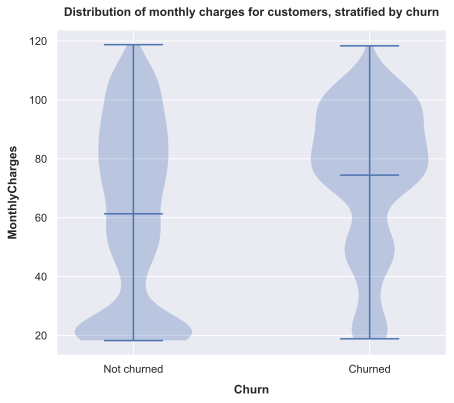

In [32]:
fig = plt.figure(figsize=(7,6))
plt.violinplot([MonthlyCharges_not_churn,MonthlyCharges_churn],[0,1], showmeans=True)
plt.xticks([0, 1], ['Not churned','Churned']);
plt.ylabel('MonthlyCharges', labelpad=10, fontweight='bold')
plt.xlabel('Churn', labelpad=10, fontweight='bold')
plt.title('Distribution of monthly charges for customers, stratified by churn', pad=14, fontweight='bold');
imagename = '1_21_Distribution_of_MonthlyCharges_stratified_by_churn'
plt.savefig(f'./images/{imagename}.svg')

#### Looking at the customers that churned, it could be seen that, most of them pay higher monthyly charges

# Distribution of TotalCharges for all customers

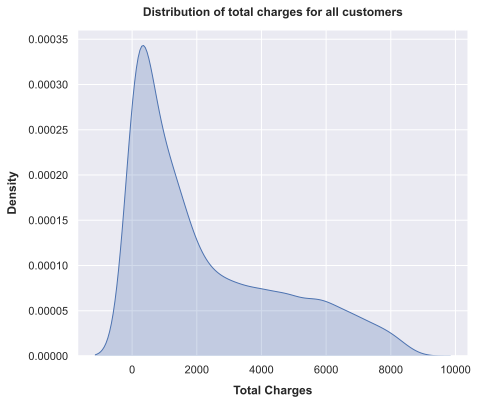

In [33]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
sns.kdeplot(data=raw_data, x="TotalCharges", fill=True, ax=ax)
plt.ylabel('Density', labelpad=10, fontweight='bold')
plt.xlabel('Total Charges', labelpad=10, fontweight='bold')
plt.title('Distribution of total charges for all customers', pad=14, fontweight='bold');
imagename = '1_22_Distribution_of_TotalCharges_all_customers'
plt.savefig(f'./images/{imagename}.svg')

# Distribution of TotalCharges for customers, stratified by churn

In [34]:
TotalCharges_churn = raw_data.loc[raw_data['Churn']=='Yes','TotalCharges'].values
TotalCharges_not_churn = raw_data.loc[raw_data['Churn']!='Yes','TotalCharges'].values

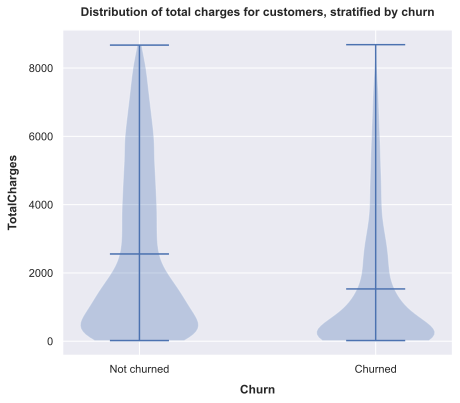

In [35]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
plt.violinplot([TotalCharges_not_churn,TotalCharges_churn],[0,1], showmeans=True)
plt.ylabel('TotalCharges', labelpad=10, fontweight='bold')
plt.xlabel('Churn', labelpad=10, fontweight='bold')
plt.xticks([0, 1], ['Not churned','Churned']);
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.title('Distribution of total charges for customers, stratified by churn', pad=14, fontweight='bold');
imagename = '1_23_Distribution_of_TotalCharges_stratified_by_churn'
plt.savefig(f'./images/{imagename}.svg')

# MonthlyCharges and TotalCharges correlation

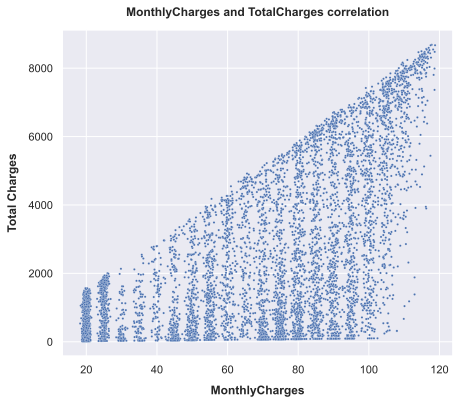

In [36]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
sns.scatterplot(data=raw_data, x='MonthlyCharges', y="TotalCharges", s=5, ax=ax, legend='')
plt.xlabel('MonthlyCharges', labelpad=10, fontweight='bold')
plt.ylabel('Total Charges', labelpad=10, fontweight='bold')
plt.title('MonthlyCharges and TotalCharges correlation', pad=14, fontweight='bold');
imagename = '1_24_Correlation_Between_MonthlyCharges_and_TotalCharges'
plt.savefig(f'./images/{imagename}.svg')

# Observations

**Overall churn rate** of the dataset is about **26%**

Effect of **gender** on churn rate seems to be negligible

#### It seems that the following features are correlated:
- "MultipleLines" is a branch of "PhoneService" --> only customers that have phone service can have multiple lines
- "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" are branches of "InternetService" --> only customers with internet service can have those services

This might be an indication that tree-based models might be a better choice for the machine learning study



**Total payment** for customers who churned seems to be lower than customers that did not churn. This could be due to the fact that the customers who churned did not make as many payments as the customres who did not churn. Therefore we should be carefull about using this variable in the model.

Churn rate is directly related to the **monthly charge**. In other words, looing at the customers who churned, churn rate is higher for customers with higher monthly charge.

### Effect of the **censoring**:

According the the results, the churn rate for this dataset is about 26%. In other words the status of churn for 73% of the customers is 'No' which means that at the end of the data collectio period, 73% of the customers are still subscribed and their tenure time is **right censored**. Additionally, a similar censoring (**left censoring**) can happen at the begining of the period. The censoring of the data, could be addressed in the context of survival analysis (see Survival notebook).